In [1]:
%load_ext jupyter_black

In [3]:
# base python lib
from glob import glob
from typing import Iterator

# 3rd parth libs
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxesSubplot
import matplotlib.pyplot as plt

from griblib.hrrr import open_gribs

In [4]:
files = glob("/workspaces/griblib/archive/alaska/*.grib2")
refd = open_gribs(files).derived_radar_reflectivity().to_dataframe()
refd

latitude   longitude  refd
y   x    valid_time                                      
0   0    2022-07-20 01:00:00  41.612949  185.117126 -10.0
         2022-07-20 00:00:00  41.612949  185.117126 -10.0
    1    2022-07-20 01:00:00  41.628373  185.141828 -10.0
         2022-07-20 00:00:00  41.628373  185.141828 -10.0
    2    2022-07-20 01:00:00  41.643791  185.166548 -10.0
...                                 ...         ...   ...
918 1296 2022-07-20 00:00:00  76.356323  243.996030 -10.0
    1297 2022-07-20 01:00:00  76.347017  244.110225 -10.0
         2022-07-20 00:00:00  76.347017  244.110225 -10.0
    1298 2022-07-20 01:00:00  76.337657  244.224263 -10.0
         2022-07-20 00:00:00  76.337657  244.224263 -10.0

[2387562 rows x 3 columns]

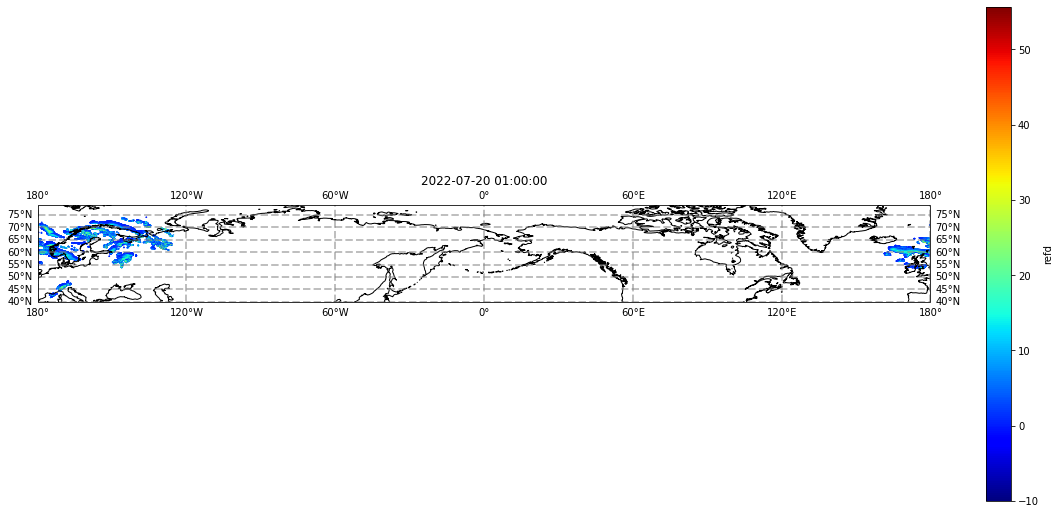

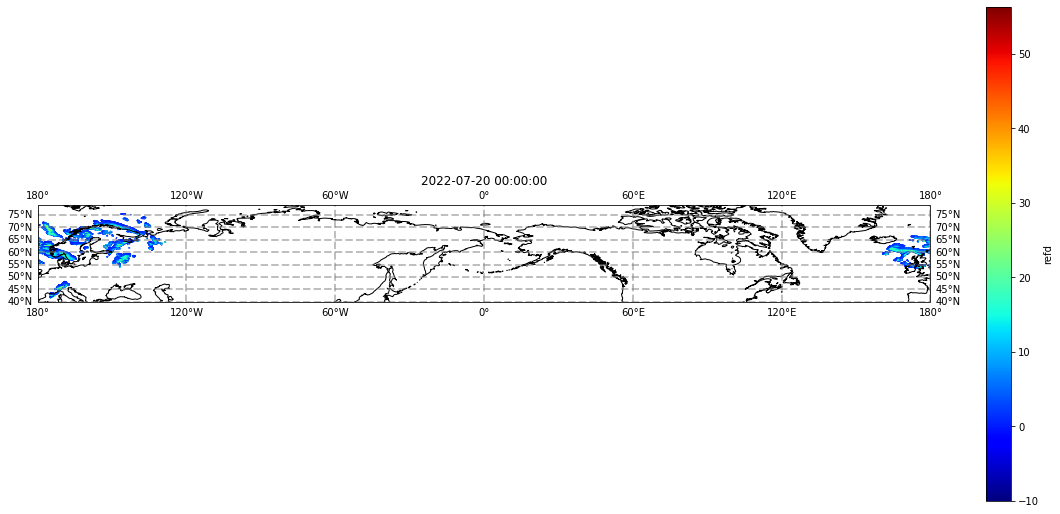

In [5]:
# TODO: something is still not correct with the project
def iterplot(df: pd.DataFrame) -> Iterator[tuple[pd.Timestamp, pd.DataFrame]]:
    df["longitude"] = (df["longitude"] + 180) % 360 - 180
    yield from df.groupby("valid_time")


# may need
for vt, frame in iterplot(refd.copy()):
    plt.figure(vt.value)
    plt.title(vt)
    ax = plt.subplot(2, 1, 1, projection=ccrs.PlateCarree(central_longitude=-180))
    ax.coastlines("50m")

    gl = ax.gridlines(
        crs=ccrs.PlateCarree(central_longitude=-180),
        draw_labels=True,
        linewidth=2,
        color="gray",
        alpha=0.5,
        linestyle="--",
    )

    # ax.set_extent(
    #     [
    #         *df["longitude"].agg(["min", "max"]),
    #         *df["latitude"].agg(["min", "max"]),
    #     ],
    #     projection,
    # )
    frame.plot.scatter(
        title=vt,
        x="longitude",
        y="latitude",
        c="refd",
        cmap=plt.get_cmap("jet"),
        alpha=np.where(frame["refd"] > 0, 1, 0),
        ax=ax,
        figsize=(20, 20),
        s=0.25,
    )